### MODELOS DE CLASIFICACION XGBOOST, CATBOOST Y RANDOM FOREST


### **1.Instalación de Librerias**



In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_val_score


from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [100]:
data = pd.read_csv('Clasificacion_picos_intensidad.csv',sep=",")

In [101]:
df=data

In [102]:
df.head()

,Unnamed: 0,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
0,316,6144.83,3323.11,8.83,74.20,10869.21,67.60,2.01,0.0
1,317,6143.40,3293.34,8.83,74.47,10867.19,67.42,1.99,0.0
2,318,6139.66,3331.12,8.83,74.50,10795.39,67.46,2.00,0.0
3,319,6138.42,3289.88,8.84,74.50,10801.26,67.08,2.01,0.0
4,320,6135.47,3286.99,8.84,74.26,10883.07,66.57,2.01,0.0


In [103]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [104]:
df=df.astype(float).round(2)

In [105]:
df.head()

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
0,6144.83,3323.11,8.83,74.20,10869.21,67.60,2.01,0.0
1,6143.40,3293.34,8.83,74.47,10867.19,67.42,1.99,0.0
2,6139.66,3331.12,8.83,74.50,10795.39,67.46,2.00,0.0
3,6138.42,3289.88,8.84,74.50,10801.26,67.08,2.01,0.0
4,6135.47,3286.99,8.84,74.26,10883.07,66.57,2.01,0.0


In [106]:
# Revision descriptiva
df.describe()

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
count,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000
mean,6015.786763,3363.326903,8.839000,75.487416,11667.772478,64.747783,2.186024,0.104835
std,134.324754,537.442267,0.536565,7.061388,1569.146488,13.439820,0.226976,0.306351
min,5566.500000,0.050000,0.010000,0.000000,-23.010000,7.640000,-0.820000,0.000000
25%,5946.590000,3092.900000,8.720000,74.330000,10713.705000,55.095000,2.020000,0.000000
50%,6032.640000,3357.810000,8.870000,75.980000,11353.280000,66.530000,2.160000,0.000000
75%,6104.040000,3662.140000,8.940000,77.850000,12634.270000,76.280000,2.370000,0.000000
max,6483.500000,4547.040000,9.340000,84.830000,15750.450000,91.370000,2.750000,1.000000


In [107]:
df.shape

(14375, 8)

In [108]:
df['picos_intens'].value_counts()

0.0    12868
1.0     1507
Name: picos_intens, dtype: int64

In [109]:
df.head()

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
0,6144.83,3323.11,8.83,74.20,10869.21,67.60,2.01,0.0
1,6143.40,3293.34,8.83,74.47,10867.19,67.42,1.99,0.0
2,6139.66,3331.12,8.83,74.50,10795.39,67.46,2.00,0.0
3,6138.42,3289.88,8.84,74.50,10801.26,67.08,2.01,0.0
4,6135.47,3286.99,8.84,74.26,10883.07,66.57,2.01,0.0


In [110]:
data=df

### **3. Exploracion de datos**

In [111]:
# Exploracion inicial
data.head()

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
0,6144.83,3323.11,8.83,74.20,10869.21,67.60,2.01,0.0
1,6143.40,3293.34,8.83,74.47,10867.19,67.42,1.99,0.0
2,6139.66,3331.12,8.83,74.50,10795.39,67.46,2.00,0.0
3,6138.42,3289.88,8.84,74.50,10801.26,67.08,2.01,0.0
4,6135.47,3286.99,8.84,74.26,10883.07,66.57,2.01,0.0


In [112]:
# Revision de la vriables individuales
data.describe()

,Presion,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo,picos_intens
count,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000
mean,6015.786763,3363.326903,8.839000,75.487416,11667.772478,64.747783,2.186024,0.104835
std,134.324754,537.442267,0.536565,7.061388,1569.146488,13.439820,0.226976,0.306351
min,5566.500000,0.050000,0.010000,0.000000,-23.010000,7.640000,-0.820000,0.000000
25%,5946.590000,3092.900000,8.720000,74.330000,10713.705000,55.095000,2.020000,0.000000
50%,6032.640000,3357.810000,8.870000,75.980000,11353.280000,66.530000,2.160000,0.000000
75%,6104.040000,3662.140000,8.940000,77.850000,12634.270000,76.280000,2.370000,0.000000
max,6483.500000,4547.040000,9.340000,84.830000,15750.450000,91.370000,2.750000,1.000000


In [113]:
# identificando valores Nulos
data.isnull().sum().sort_values(ascending=False)

picos_intens    0
Brazo           0
F80             0
Potencia        0
%Solidos        0
Velocidad       0
Tonelaje        0
Presion         0
dtype: int64

In [115]:
data.columns

Index(['Presion', 'Tonelaje', 'Velocidad', '%Solidos', 'Potencia', 'F80',
       'Brazo', 'picos_intens'],
      dtype='object')

In [116]:
# Dimensiones de la tabla de modelamiento (fila, Columna)
data.shape

(14375, 8)

In [117]:
# Detección del desbalance de la muestras
data.groupby('picos_intens').size()

picos_intens
0.0    12868
1.0     1507
dtype: int64

In [118]:
round(1507 / 14375,4)

0.1048

In [119]:
round(data.picos_intens.value_counts(normalize=True),4)

0.0    0.8952
1.0    0.1048
Name: picos_intens, dtype: float64

Class 0 Intensidad_Normal: 12868
Class 1 Intensidad_Pico: 1507
Proporción: 8.54 : 1


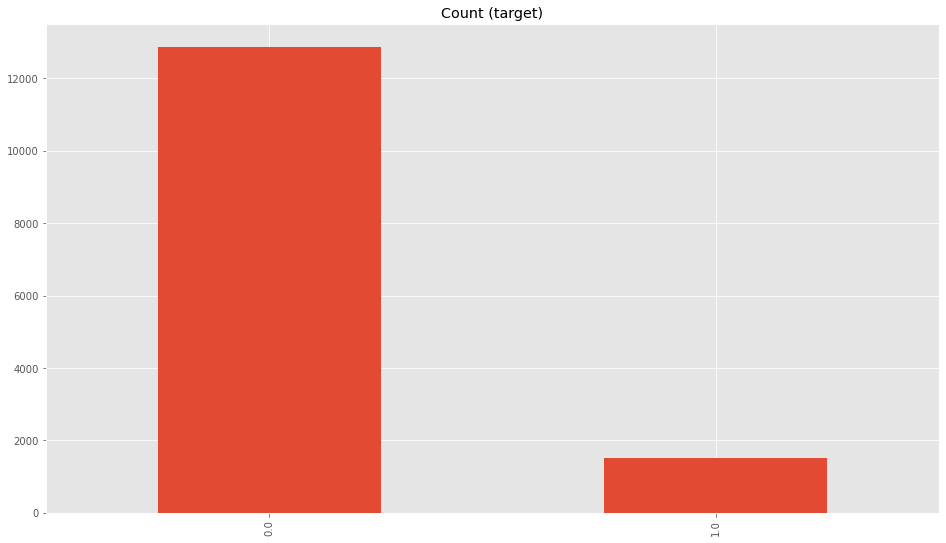

In [121]:
# Detección del desbalance de la muestras
target_count = data.picos_intens.value_counts()
print('Class 0 Intensidad_Normal:', target_count[0])
print('Class 1 Intensidad_Pico:', target_count[1])
print('Proporción:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

### **4. Separando una muestra para verificar resultado de estrategias de muestreo**

In [122]:
# Seleccionaremos un 35% de los datos para estrudiar el beneficio de las estretgias de muestreo

X = data[['Presion',  'Tonelaje', 'Velocidad','%Solidos', 'Potencia', 'F80', 'Brazo']]
y = data[['picos_intens']]

import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.35,random_state=42)

### **5. Evaluando la escenarios de modelamiento XGBoost**

In [69]:
!pip install xgboost

In [123]:
import xgboost as xgb

In [124]:
#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier() # MALA PRACTICA

In [125]:
# parameters tunning
# XGB tunning
model2 = xgb.XGBClassifier(n_estimators=20 , max_depth=8, learning_rate=0.1 , subsample=0.5)

In [126]:
import catboost
from catboost import CatBoostClassifier

In [74]:
#Train the XGboost Model for Classification
model3 = CatBoostClassifier()

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
#Train the XGboost Model for Classification
model4 = RandomForestClassifier()

In [129]:
# parameters tunning
# RF tunning
model5 = RandomForestClassifier(n_estimators=20, max_depth=8)

In [130]:
model1.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[21:37:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [131]:
model2.fit(X_train, y_train)

[21:38:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [132]:
model3.fit(X_train, y_train)

Learning rate set to 0.02675
0:	learn: 0.6398355	total: 14ms	remaining: 14s
1:	learn: 0.5914772	total: 23.3ms	remaining: 11.6s
2:	learn: 0.5446362	total: 37.4ms	remaining: 12.4s
3:	learn: 0.5037899	total: 47.1ms	remaining: 11.7s
4:	learn: 0.4642180	total: 56.6ms	remaining: 11.3s
5:	learn: 0.4296417	total: 67.1ms	remaining: 11.1s
6:	learn: 0.4004423	total: 81.1ms	remaining: 11.5s
7:	learn: 0.3755552	total: 91.4ms	remaining: 11.3s
8:	learn: 0.3506807	total: 104ms	remaining: 11.5s
9:	learn: 0.3297097	total: 116ms	remaining: 11.5s
10:	learn: 0.3101149	total: 125ms	remaining: 11.2s
11:	learn: 0.2920480	total: 136ms	remaining: 11.2s
12:	learn: 0.2768354	total: 144ms	remaining: 10.9s
13:	learn: 0.2618569	total: 153ms	remaining: 10.8s
14:	learn: 0.2488962	total: 162ms	remaining: 10.6s
15:	learn: 0.2384653	total: 171ms	remaining: 10.5s
16:	learn: 0.2265480	total: 181ms	remaining: 10.5s
17:	learn: 0.2179333	total: 192ms	remaining: 10.5s
18:	learn: 0.2096448	total: 209ms	remaining: 10.8s
19:	lear

168:	learn: 0.0754331	total: 1.75s	remaining: 8.62s
169:	learn: 0.0752984	total: 1.76s	remaining: 8.61s
170:	learn: 0.0750928	total: 1.77s	remaining: 8.6s
171:	learn: 0.0748910	total: 1.79s	remaining: 8.6s
172:	learn: 0.0747793	total: 1.8s	remaining: 8.61s
173:	learn: 0.0747041	total: 1.81s	remaining: 8.59s
174:	learn: 0.0746739	total: 1.82s	remaining: 8.58s
175:	learn: 0.0745668	total: 1.83s	remaining: 8.56s
176:	learn: 0.0744988	total: 1.84s	remaining: 8.54s
177:	learn: 0.0743828	total: 1.84s	remaining: 8.52s
178:	learn: 0.0742078	total: 1.85s	remaining: 8.5s
179:	learn: 0.0739741	total: 1.86s	remaining: 8.48s
180:	learn: 0.0738600	total: 1.87s	remaining: 8.46s
181:	learn: 0.0736240	total: 1.88s	remaining: 8.44s
182:	learn: 0.0735760	total: 1.88s	remaining: 8.41s
183:	learn: 0.0735405	total: 1.89s	remaining: 8.39s
184:	learn: 0.0733933	total: 1.9s	remaining: 8.37s
185:	learn: 0.0732358	total: 1.91s	remaining: 8.35s
186:	learn: 0.0731891	total: 1.92s	remaining: 8.34s
187:	learn: 0.073

338:	learn: 0.0597579	total: 3.32s	remaining: 6.48s
339:	learn: 0.0597409	total: 3.33s	remaining: 6.47s
340:	learn: 0.0595878	total: 3.35s	remaining: 6.47s
341:	learn: 0.0595629	total: 3.36s	remaining: 6.46s
342:	learn: 0.0595372	total: 3.37s	remaining: 6.45s
343:	learn: 0.0595141	total: 3.38s	remaining: 6.44s
344:	learn: 0.0594532	total: 3.38s	remaining: 6.42s
345:	learn: 0.0594226	total: 3.39s	remaining: 6.41s
346:	learn: 0.0593227	total: 3.4s	remaining: 6.41s
347:	learn: 0.0592570	total: 3.41s	remaining: 6.39s
348:	learn: 0.0591875	total: 3.42s	remaining: 6.38s
349:	learn: 0.0591590	total: 3.43s	remaining: 6.37s
350:	learn: 0.0591307	total: 3.44s	remaining: 6.36s
351:	learn: 0.0591147	total: 3.44s	remaining: 6.34s
352:	learn: 0.0590119	total: 3.45s	remaining: 6.33s
353:	learn: 0.0589766	total: 3.46s	remaining: 6.32s
354:	learn: 0.0589640	total: 3.47s	remaining: 6.3s
355:	learn: 0.0588586	total: 3.48s	remaining: 6.29s
356:	learn: 0.0588415	total: 3.49s	remaining: 6.28s
357:	learn: 0.

507:	learn: 0.0503985	total: 4.89s	remaining: 4.73s
508:	learn: 0.0503332	total: 4.9s	remaining: 4.72s
509:	learn: 0.0503296	total: 4.91s	remaining: 4.72s
510:	learn: 0.0502949	total: 4.92s	remaining: 4.71s
511:	learn: 0.0502913	total: 4.93s	remaining: 4.7s
512:	learn: 0.0502516	total: 4.94s	remaining: 4.69s
513:	learn: 0.0502491	total: 4.95s	remaining: 4.68s
514:	learn: 0.0502466	total: 4.96s	remaining: 4.67s
515:	learn: 0.0501717	total: 4.97s	remaining: 4.66s
516:	learn: 0.0500658	total: 4.98s	remaining: 4.65s
517:	learn: 0.0500459	total: 4.98s	remaining: 4.64s
518:	learn: 0.0499468	total: 4.99s	remaining: 4.63s
519:	learn: 0.0499099	total: 5s	remaining: 4.61s
520:	learn: 0.0498580	total: 5.01s	remaining: 4.6s
521:	learn: 0.0497596	total: 5.02s	remaining: 4.59s
522:	learn: 0.0497067	total: 5.03s	remaining: 4.58s
523:	learn: 0.0496358	total: 5.04s	remaining: 4.57s
524:	learn: 0.0495841	total: 5.04s	remaining: 4.56s
525:	learn: 0.0495130	total: 5.05s	remaining: 4.55s
526:	learn: 0.0494

678:	learn: 0.0430889	total: 6.46s	remaining: 3.06s
679:	learn: 0.0430409	total: 6.47s	remaining: 3.05s
680:	learn: 0.0429956	total: 6.48s	remaining: 3.04s
681:	learn: 0.0429796	total: 6.49s	remaining: 3.03s
682:	learn: 0.0429410	total: 6.5s	remaining: 3.02s
683:	learn: 0.0428986	total: 6.51s	remaining: 3.01s
684:	learn: 0.0428915	total: 6.52s	remaining: 3s
685:	learn: 0.0428847	total: 6.53s	remaining: 2.99s
686:	learn: 0.0428330	total: 6.54s	remaining: 2.98s
687:	learn: 0.0427781	total: 6.54s	remaining: 2.97s
688:	learn: 0.0427309	total: 6.55s	remaining: 2.96s
689:	learn: 0.0426931	total: 6.56s	remaining: 2.95s
690:	learn: 0.0426502	total: 6.57s	remaining: 2.94s
691:	learn: 0.0425865	total: 6.58s	remaining: 2.93s
692:	learn: 0.0425830	total: 6.58s	remaining: 2.92s
693:	learn: 0.0425505	total: 6.59s	remaining: 2.91s
694:	learn: 0.0425292	total: 6.6s	remaining: 2.9s
695:	learn: 0.0424810	total: 6.61s	remaining: 2.89s
696:	learn: 0.0424544	total: 6.62s	remaining: 2.88s
697:	learn: 0.0424

837:	learn: 0.0381896	total: 7.85s	remaining: 1.52s
838:	learn: 0.0381827	total: 7.86s	remaining: 1.51s
839:	learn: 0.0381435	total: 7.87s	remaining: 1.5s
840:	learn: 0.0380810	total: 7.88s	remaining: 1.49s
841:	learn: 0.0380490	total: 7.89s	remaining: 1.48s
842:	learn: 0.0380026	total: 7.9s	remaining: 1.47s
843:	learn: 0.0379701	total: 7.91s	remaining: 1.46s
844:	learn: 0.0379633	total: 7.92s	remaining: 1.45s
845:	learn: 0.0379567	total: 7.92s	remaining: 1.44s
846:	learn: 0.0379255	total: 7.93s	remaining: 1.43s
847:	learn: 0.0378949	total: 7.94s	remaining: 1.42s
848:	learn: 0.0378297	total: 7.95s	remaining: 1.41s
849:	learn: 0.0378238	total: 7.96s	remaining: 1.4s
850:	learn: 0.0378205	total: 7.96s	remaining: 1.39s
851:	learn: 0.0377850	total: 7.97s	remaining: 1.38s
852:	learn: 0.0377793	total: 7.98s	remaining: 1.38s
853:	learn: 0.0377626	total: 7.99s	remaining: 1.37s
854:	learn: 0.0377267	total: 8s	remaining: 1.36s
855:	learn: 0.0376975	total: 8.01s	remaining: 1.35s
856:	learn: 0.0376

In [133]:
model4.fit(X_train, y_train)

<ipython-input-133-e1373b20bd5a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(X_train, y_train)


RandomForestClassifier()

In [134]:
model5.fit(X_train, y_train)

<ipython-input-134-22bcca698d6e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model5.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, n_estimators=20)

In [135]:
# Agregabdo un clasificador de arbol simple
from sklearn.tree import DecisionTreeClassifier

model6 = DecisionTreeClassifier()
model6.fit(X_train, y_train)

DecisionTreeClassifier()

In [136]:
import sklearn
sklearn.__version__

'0.23.2'

In [137]:
from sklearn.metrics import classification_report

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)

In [138]:
pred1

array([1., 0., 0., ..., 0., 0., 0.])

In [165]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred1)

array([[4476,   44],
       [ 101,  411]], dtype=int64)

In [154]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      4520
         1.0       0.90      0.80      0.85       512

    accuracy                           0.97      5032
   macro avg       0.94      0.90      0.92      5032
weighted avg       0.97      0.97      0.97      5032



In [155]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      4520
         1.0       0.91      0.72      0.80       512

    accuracy                           0.96      5032
   macro avg       0.94      0.85      0.89      5032
weighted avg       0.96      0.96      0.96      5032



In [156]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      4520
         1.0       0.92      0.78      0.85       512

    accuracy                           0.97      5032
   macro avg       0.95      0.89      0.92      5032
weighted avg       0.97      0.97      0.97      5032



In [157]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      4520
         1.0       0.92      0.79      0.85       512

    accuracy                           0.97      5032
   macro avg       0.95      0.89      0.92      5032
weighted avg       0.97      0.97      0.97      5032



In [158]:
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      4520
         1.0       0.96      0.69      0.81       512

    accuracy                           0.97      5032
   macro avg       0.96      0.85      0.89      5032
weighted avg       0.97      0.97      0.96      5032



In [159]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4520
         1.0       0.81      0.79      0.80       512

    accuracy                           0.96      5032
   macro avg       0.89      0.89      0.89      5032
weighted avg       0.96      0.96      0.96      5032



In [160]:
df = pd.DataFrame({'algorithm' : ['XGBoost','XGBoost Tuneado','Catboost','RF','RF Tuneado','Arbol de Decision'],
                   'precision' : [0.90, 0.91, 0.92,0.92,0.96,0.81],
                   'recall' : [0.80, 0.72, 0.78,0.79,0.69,0.79]})

In [95]:
df

,algorithm,precision,recall
0,XGBoost,0.90,0.80
1,XGBoost Tuneado,0.91,0.72
2,Catboost,0.92,0.78
3,RF,0.92,0.77
4,RF Tuneado,0.95,0.71
5,Arbol de Decision,0.82,0.78


In [161]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy for model 1: %.2f" % (accuracy_score(y_test, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test, pred2) * 100))
print("Accuracy for model 3: %.2f" % (accuracy_score(y_test, pred3) * 100))
print("Accuracy for model 4: %.2f" % (accuracy_score(y_test, pred4) * 100))
print("Accuracy for model 5: %.2f" % (accuracy_score(y_test, pred5) * 100))
print("Accuracy for model 6: %.2f" % (accuracy_score(y_test, pred6) * 100))

Accuracy for model 1: 97.12
Accuracy for model 2: 96.38
Accuracy for model 3: 97.12
Accuracy for model 4: 97.14
Accuracy for model 5: 96.60
Accuracy for model 6: 96.05


Matriz de Confusión MODELO GANADOR:
 [[4476   44]
 [ 101  411]]
Métricas de Matriz de Confusión - MODELO GANADOR:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      4520
         1.0       0.90      0.80      0.85       512

    accuracy                           0.97      5032
   macro avg       0.94      0.90      0.92      5032
weighted avg       0.97      0.97      0.97      5032



<ipython-input-162-a888068966c2>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-162-a888068966c2>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


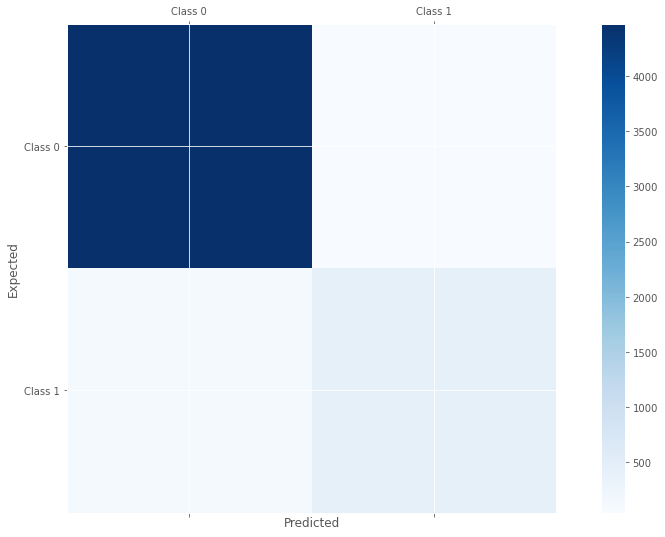

In [162]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred1) ##Modificar al modelo
#--------------------------------------------------------------------

print('Matriz de Confusión MODELO GANADOR:\n', conf_mat)

print('Métricas de Matriz de Confusión - MODELO GANADOR:\n',classification_report(y_test,pred6))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

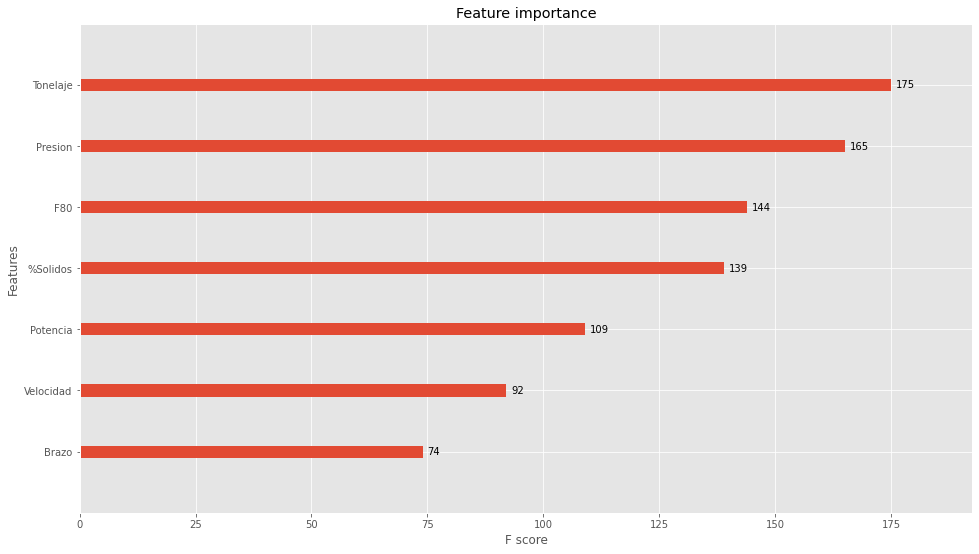

In [164]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(model2)
pyplot.show()